In [1]:
import os
import ast
import scipy
import pandas as pd
import numpy as np
import nibabel as nib
from tqdm.auto import tqdm

/opt/anaconda3/envs/master_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# mdata = [scipy.io.loadmat(os.path.join('data', 'mitchell', file)) for file in os.listdir('data/mitchell')]

### Filter voxel overlap

In [3]:
# participants = []
# for participant in mdata:
#     voxel_coords = list(map(tuple, participant['meta'][0][0]['colToCoord']))
#     voxel_to_index = {}
#     for voxel_coord in voxel_coords:
#         index = participant['meta'][0][0]['coordToCol'][voxel_coord]
#         if index != 0:
#             voxel_to_index[voxel_coord] = index
#     trials = participant['data']
#     participants.append({
#         'trials': trials,
#         'voxel_to_index': voxel_to_index
#     })

In [4]:
# common_voxel_coordinates = set(participants[0]['voxel_to_index'].keys())
# for dictionary in participants[1:]:
#     common_voxel_coordinates.intersection_update(set(dictionary['voxel_to_index'].keys()))

In [5]:
# mdata_common_voxels = []
# for i in tqdm(range(len(participants))):
#     trials_activation = participants[i]['trials']
#     voxel_to_index = participants[i]['voxel_to_index']
#     trials_activation_common_voxels = []
    
#     for activations in trials_activation:
#         voxel_to_activation = {voxel_coord: activations[0][0][index] for voxel_coord, index in voxel_to_index.items() 
#                                if voxel_coord in common_voxel_coordinates}
#         if i == 0:
#             common_voxels_list_ordered = list(voxel_to_activation.keys())
#         activations_array = np.array([voxel_to_activation[voxel_coord] for voxel_coord in common_voxels_list_ordered])
        
#         trials_activation_common_voxels.append(activations_array)
#     mdata_common_voxels.append(trials_activation_common_voxels)
# voxel_coordinates = common_voxels_list_ordered

In [6]:
# arrays = {}
# for i in tqdm(range(len(mdata))):
#     for item in mdata[i]['info'][0]:
#         word = item[2][0]
#         if word in arrays:
#             arrays[word].append(mdata_common_voxels[i][np.where(mdata[i]['info'][0] == item)[0][0]])
#         else:
#             arrays[word] = [mdata_common_voxels[i][np.where(mdata[i]['info'][0] == item)[0][0]]]

##### old way of selecting voxels:

In [7]:
# participants = []
# for participant in mdata:
#     voxel_ids = list(map(tuple, participant['meta'][0][0][7]))
#     voxel_activations = participant['data']
#     participants.append((voxel_ids, voxel_activations))

# common_voxel_ids = set(participants[0][0])
# for ids, _ in participants[1:]:
#     common_voxel_ids.intersection_update(ids)

# mdata_common_voxels = []
# for participant in tqdm(participants):
#     voxel_ids = participant[0]
#     trials_activation = participant[1]
#     common_activations = []
#     for activations in trials_activation:
#         activation_dict = {voxel_id: activation for voxel_id, activation in zip(voxel_ids, activations[0][0])}
#         activations_list = []
#         voxel_id_list = []
#         for voxel_id in common_voxel_ids:
#             activations_list.append(activation_dict[voxel_id])
#             voxel_id_list.append(voxel_id)
#         common_activations.append((voxel_id_list, np.array(activations_list)))
#     mdata_common_voxels.append(common_activations)
# voxel_coordinates = mdata_common_voxels[0][0][0]

# arrays = {}
# for i in range(len(mdata)):
#     for item in mdata[i]['info'][0]:
#         word = item[2][0]
#         if word in arrays:
#             arrays[word].append(mdata_common_voxels[i][np.where(mdata[i]['info'][0] == item)[0][0]][1])
#         else:
#             arrays[word] = [mdata_common_voxels[i][np.where(mdata[i]['info'][0] == item)[0][0]][1]]

### Voxels atlas

In [8]:
given_vox_atlas = scipy.io.loadmat("../mitchel_matlab/functions/ccbi_aal_atlas.mat")

In [9]:
given_vox_atlas['Y'].shape

(91, 109, 91)

In [10]:
resampled_atlas_path = "data/atlas_resampled_to_results.nii.gz"
resampled_atlas = nib.load(resampled_atlas_path)
resampled_atlas_data = resampled_atlas.get_fdata()

### Create voxels-nouns matrix (13189 x 60)

In [11]:
# averaged_arrays = {}
# for word in arrays.keys():
#     averaged_arrays[word] = np.mean(np.stack(arrays[word]), axis=0)

In [12]:
# df_voxel_noun = pd.DataFrame.from_dict(averaged_arrays)

In [13]:
# df_voxel_noun = df_voxel_noun.sort_index(axis=1)

In [14]:
# df_voxel_noun.to_csv('data/df_voxel_noun.csv')

In [15]:
df_voxel_noun = pd.read_csv(os.path.join("data","df_voxel_noun.csv"), index_col='Unnamed: 0')

In [16]:
df_voxel_noun.head()

,airplane,ant,apartment,arch,arm,barn,bear,bed,bee,beetle,...,shirt,skirt,spoon,table,telephone,tomato,train,truck,watch,window
0,0.063832,-0.026676,0.127697,0.274798,-0.203961,-0.032681,-0.060195,0.066288,-0.222690,0.112731,...,-0.225710,0.166203,-0.017863,0.227752,-0.047540,-0.034999,-0.044260,0.097742,0.078315,0.098850
1,0.184960,-0.036665,0.183567,0.279492,-0.098973,-0.030083,0.032659,0.142248,-0.118458,0.195798,...,-0.294790,0.305066,0.031800,0.103996,-0.003700,0.229995,-0.047479,0.092701,-0.047209,0.030485
2,-0.000671,0.191284,-0.041240,0.397753,-0.029303,0.099431,0.097270,0.122762,-0.133254,0.230988,...,-0.017175,0.219259,0.116473,0.117935,-0.005997,0.016107,-0.007767,0.196456,-0.030453,0.115465
3,0.150802,-0.020088,0.099508,0.112445,0.293103,0.199245,0.009471,0.272694,0.067051,0.212112,...,0.035148,0.227960,-0.071504,-0.140920,0.077197,0.303890,0.247089,-0.203995,0.117254,0.087734
4,0.282528,-0.171928,-0.000297,0.113246,0.057969,-0.031948,-0.095087,0.164862,-0.014183,0.060032,...,-0.264855,0.245518,-0.189936,-0.104663,-0.048999,0.347093,0.084615,-0.194797,-0.049962,-0.073756


### Create nouns-sem_featuers matrix (60 x 25)

In [17]:
sem_features_file = os.path.join("data","mitchell_semantic_raw.txt")
semantic_features = {}
with open(sem_features_file, 'r') as f:
    lines = f.readlines()
    word = None
    for line in lines:
        if len(line) >= 5:
            if "Features for" in line:
                if word and len(semantic_features[word]['features']) < 25: del semantic_features[word] 
                word = line.split("<a name=\"")[1].split("\"")[0]
                semantic_features[word] = { "features": [], "values": []}
            elif word:
                feature_name = line.split()[0]
                val = float(line.split("(")[1].split(")")[0])
                semantic_features[word]["features"].append(feature_name)
                semantic_features[word]["values"].append(val)

In [18]:
df_noun_feature = pd.DataFrame()
for noun, info in semantic_features.items():
    temp_df = pd.DataFrame({
        'feature': info['features'],
        'value': info['values'],
        'noun': noun})
    df_noun_feature = pd.concat([df_noun_feature, temp_df], ignore_index=True)

df_noun_feature = df_noun_feature.pivot(columns='feature', values='value', index='noun')

In [19]:
df_noun_feature.head()

feature,approach,break,clean,drive,eat,enter,fear,fill,hear,lift,...,push,ride,rub,run,say,see,smell,taste,touch,wear
noun,,,,,,,,,,,,,,,,,,,,,
airplane,0.048,0.028,0.019,0.023,0.024,0.056,0.019,0.032,0.066,0.072,...,0.024,0.918,0.000,0.052,0.201,0.221,0.005,0.000,0.048,0.001
ant,0.023,0.017,0.132,0.010,0.062,0.016,0.005,0.005,0.016,0.016,...,0.000,0.015,0.006,0.944,0.156,0.198,0.000,0.006,0.005,0.003
apartment,0.009,0.064,0.238,0.070,0.012,0.210,0.002,0.080,0.021,0.024,...,0.002,0.007,0.000,0.075,0.093,0.200,0.036,0.000,0.002,0.000
arch,0.060,0.047,0.185,0.075,0.035,0.032,0.024,0.054,0.012,0.053,...,0.004,0.018,0.007,0.129,0.244,0.474,0.000,0.000,0.127,0.015
arm,0.019,0.432,0.021,0.071,0.008,0.024,0.005,0.026,0.007,0.548,...,0.084,0.010,0.030,0.103,0.450,0.132,0.001,0.002,0.206,0.048


### Glove embeddings matrix (60 x 300)

In [20]:
# glove_file = os.path.join("data", "glove.6B","glove.6B.300d.txt")
# with open(glove_file, 'r') as f:
#     lines = f.readlines()

In [21]:
# glove_embeddings = {}
# for line in lines:
#     word = line.split()[0]
#     if word in averaged_arrays.keys():
#         glove_embeddings[word] = line.split()[1:]

In [22]:
# df_noun_glove = pd.DataFrame.from_dict(glove_embeddings, orient='index')
# df_noun_glove = df_noun_glove.sort_index()

In [23]:
# df_noun_glove.to_csv('data/df_noun_glove.csv')

In [24]:
df_noun_glove = pd.read_csv(os.path.join("data","df_noun_glove.csv"), index_col='Unnamed: 0')

In [25]:
df_noun_glove.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
airplane,0.48249,0.10947,-0.380120,-0.76237,-0.405000,0.20356,-0.060407,0.179680,-0.096102,-1.04280,...,0.398960,-0.42762,-0.167460,-0.507660,0.22887,0.351000,-0.638620,0.076178,-0.220750,0.42687
ant,-0.26462,0.80371,0.241130,0.75088,0.139540,0.21279,0.074054,0.503050,0.028712,-0.33970,...,-0.052364,-0.74158,-0.270650,0.580480,-0.61165,-0.064773,0.025781,0.198570,0.410340,0.19518
apartment,-0.47123,0.38333,-0.686140,-0.29108,0.206170,0.46783,0.117370,-0.405800,-0.041971,-0.81328,...,-0.315420,-0.26152,0.193730,0.071406,0.40318,0.359300,0.570190,0.084122,0.194190,0.53200
arch,0.23834,-0.37957,0.368080,-0.78334,-0.022668,0.14949,-0.015956,-0.134990,0.060803,-0.39301,...,0.168240,0.32338,-0.158510,0.551930,-0.21447,0.633320,0.524970,0.090645,-0.442900,0.28394
arm,0.14602,-0.62674,0.021741,-0.41299,-0.218350,0.10637,-0.293350,0.006316,-0.222870,-1.72170,...,0.395280,0.28598,-0.068885,-0.203720,-0.35582,0.624800,0.060736,0.186610,0.011764,-0.23978


### Linear Regression

#### Compute coefficients and R^2 scores

In [26]:
# from sklearn.linear_model import LinearRegression

In [27]:
# X = df_noun_feature
# y = df_voxel_noun

In [28]:
# df_coefficients = pd.DataFrame(index=range(y.shape[0]), columns=X.columns.append(pd.Index(['R2'])))
# df_coefficients.index.name = 'voxel'

In [29]:
# for i in tqdm(range(y.shape[0])):
#     lin_reg = LinearRegression()
#     lin_reg.fit(X, y.iloc[i])
#     r_2 = lin_reg.score(X, y.iloc[i])
#     df_coefficients.iloc[i] = np.append(lin_reg.coef_, r_2)
# df_coefficients['coordinates'] = voxel_coordinates

In [30]:
# df_coefficients['brain_region'] = df_coefficients['coordinates'].apply(lambda coords: given_vox_atlas['label'][given_vox_atlas['id'] ==
#                                                                        [resampled_atlas_data[coords[0]][coords[1]][coords[2]]]][0][0][0][0])

In [31]:
# df_coefficients.to_csv('data/df_coefficients.csv')

In [32]:
df_coefficients = pd.read_csv(os.path.join("data","df_coefficients.csv"), index_col='voxel')

In [33]:
df_coefficients['coordinates'] = df_coefficients['coordinates'].apply(lambda x: ast.literal_eval(x))

In [34]:
df_coefficients.head()

,approach,break,clean,drive,eat,enter,fear,fill,hear,lift,...,run,say,see,smell,taste,touch,wear,R2,coordinates,brain_region
voxel,,,,,,,,,,,,,,,,,,,,,
0,-0.271366,-0.129926,0.039990,0.002676,0.054205,0.079863,0.377785,-0.230451,0.126415,0.062615,...,-0.062315,-0.225362,0.104738,-0.510147,-0.122619,0.185360,0.121294,0.445397,"(17, 11, 3)",Cerebelum_Crus1_R
1,-0.172652,-0.062537,0.069148,0.095301,0.066788,0.053151,0.225137,-0.209687,-0.620936,-0.022872,...,-0.057242,-0.047723,0.006832,0.264452,0.276974,0.175701,0.083315,0.306917,"(17, 12, 3)",Cerebelum_Crus1_R
2,0.022618,0.001241,-0.053402,0.126277,0.035203,0.086168,0.229657,-0.187852,-0.796024,0.077441,...,0.220950,-0.074165,0.091734,0.180902,0.118366,0.103993,0.136495,0.582972,"(18, 12, 3)",Cerebelum_Crus1_R
3,-0.127041,0.290059,0.119438,0.066721,0.170835,0.264527,0.784374,-0.287687,-1.298661,-0.105235,...,-0.085681,0.152520,-0.218305,-0.230673,0.426521,0.129000,-0.035795,0.461170,"(15, 13, 3)",Cerebelum_Crus1_R
4,-0.113437,0.088372,-0.043052,0.028236,0.141995,0.129472,0.466779,-0.086643,-1.236748,0.008348,...,-0.115038,0.121366,-0.077274,0.148459,0.411412,0.309631,0.022584,0.376710,"(16, 13, 3)",Cerebelum_Crus1_R


### Brain images

#### plot model coefficients for a semantic feature

In [35]:
from nilearn.plotting import plot_glass_brain

In [36]:
volume_shape = resampled_atlas_data.shape
brain_volume = np.zeros(volume_shape)

In [37]:
for index, row in df_coefficients.iterrows():
    coordinates = row['coordinates']
    x, y, z = coordinates[0], coordinates[1], coordinates[2]
    brain_volume[x, y, z] = row['see']

In [38]:
affine = np.array([[-3.125, 0,     0,   81.250],
                   [0,     3.125, 0, -115.625],
                   [0,     0,     6,  -54.000],
                   [0,     0,     0,    1.000]])

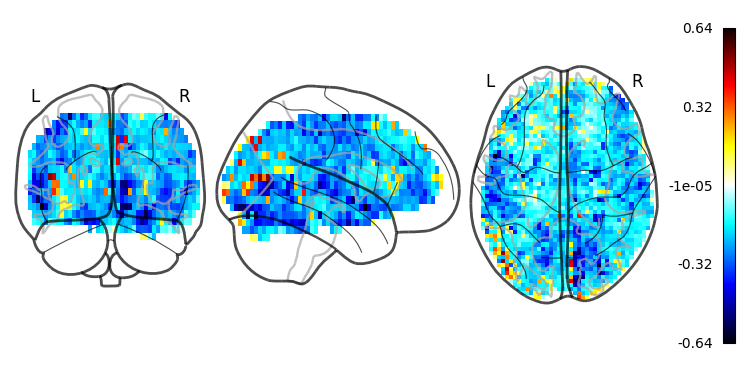

In [39]:
nii_image = nib.Nifti1Image(brain_volume, affine=affine)
plot_glass_brain(nii_image, display_mode='ortho', colorbar=True, plot_abs=False)

#### plot model's R2

In [40]:
import matplotlib.pyplot as plt

In [41]:
brain_volume_r_2 = np.zeros(volume_shape)

In [42]:
for index, row in df_coefficients.iterrows():
    coordinates = row['coordinates']
    x, y, z = coordinates[0], coordinates[1], coordinates[2]
    brain_volume_r_2[x, y, z] = row['R2']

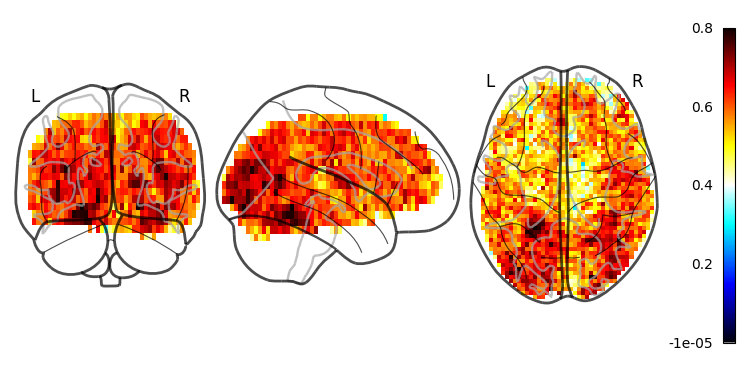

In [43]:
nii_image_r_2 = nib.Nifti1Image(brain_volume_r_2, affine=affine)
plot_glass_brain(nii_image_r_2, display_mode='ortho', colorbar=True, plot_abs=False)

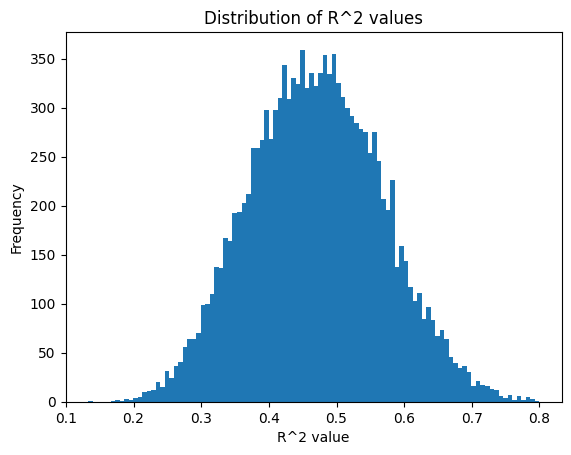

In [44]:
plt.hist(df_coefficients['R2'].astype(float), bins=100)
plt.xlabel('R^2 value')
plt.ylabel('Frequency')
plt.title('Distribution of R^2 values')
plt.show()

### Clustering

In [45]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [46]:
scaler = StandardScaler()
df_r2 = df_coefficients[['coordinates', 'brain_region', 'R2']]

In [47]:
df_r2_top_half = df_r2[df_r2['R2'] > df_r2['R2'].median()]

In [48]:
coordinates = np.array(list(df_r2_top_half['coordinates']))

In [49]:
coordinates_scaled = scaler.fit_transform(coordinates)

In [50]:
connectivity = kneighbors_graph(coordinates_scaled, n_neighbors=2, include_self=False)

In [51]:
# Define the AgglomerativeClustering model with connectivity constraints
agg_clustering = AgglomerativeClustering(n_clusters=None, connectivity=connectivity, distance_threshold=10)

In [52]:
# Fit the model and predict clusters
df_r2_top_half['cluster'] = agg_clustering.fit_predict(coordinates_scaled)

/opt/anaconda3/envs/master_project/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:322: UserWarning: the number of connected components of the connectivity matrix is 169 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
/var/folders/xg/v6f13_951rs60k5l7yzhm1km0000gn/T/ipykernel_61058/3907097256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r2_top_half['cluster'] = agg_clustering.fit_predict(coordinates_scaled)


In [53]:
cluster_means = df_r2_top_half.groupby('cluster')['R2'].mean()

In [54]:
print('total number of clusters:', len(cluster_means))

total number of clusters: 28


In [55]:
highest_activity_cluster = cluster_means.idxmax()
print(f'The cluster with the highest activity is: {highest_activity_cluster}')

The cluster with the highest activity is: 9


#### plot cluster's R2

In [56]:
from collections import Counter

In [57]:
volume_shape = resampled_atlas_data.shape
brain_volume_cluster = np.zeros(volume_shape)

In [58]:
vox_coord_to_brain_regions = {}
for index, row in df_r2_top_half.iterrows():
    if row['cluster'] == highest_activity_cluster:
        coordinates = row['coordinates']
        x, y, z = coordinates[0], coordinates[1], coordinates[2]
        brain_volume_cluster[x, y, z] = row['R2']

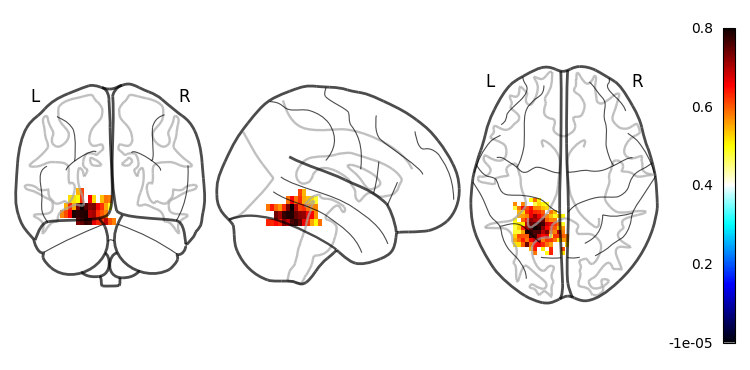

In [59]:
nii_image = nib.Nifti1Image(brain_volume_cluster, affine=affine)
plot_glass_brain(nii_image, display_mode='ortho', colorbar=True, plot_abs=False)

### RDM and similarity matrices

#### cluster voxels x nouns

In [60]:
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import cosine_similarity

In [61]:
cluster_voxel_ids = df_r2_top_half[df_r2_top_half['cluster'] == highest_activity_cluster].index.values.tolist()

In [62]:
# (Noun x Voxels from a cluster) matrix
df_noun_voxels_highest_cluster = df_voxel_noun.iloc[cluster_voxel_ids].T

In [63]:
df_noun_voxels_cluster_sorted = df_noun_voxels_highest_cluster.sort_index()

In [64]:
# dissimilarity_matrix_voxels = pdist(df_noun_voxels_cluster_sorted, metric='cosine')
sim_matrix_voxels = cosine_similarity(df_noun_voxels_cluster_sorted)

#### Glove x noun

In [65]:
from scipy.stats import pearsonr, spearmanr

In [66]:
df_noun_glove_sorted = df_noun_glove.sort_index()

In [67]:
# dissimilarity_matrix_glove = pdist(df_noun_glove_sorted, metric='cosine')
sim_matrix_glove = cosine_similarity(df_noun_glove_sorted)
numpy_matrix_glove = df_noun_glove_sorted.to_numpy(dtype=float)

#### Nouns x sem features

In [68]:
# dissimilarity_matrix_noun_sem_feature = pdist(df_noun_feature, metric='cosine')
sim_matrix_noun_sem_features = cosine_similarity(df_noun_feature)

#### compute correlations similarity matrices

In [69]:
# Step 1: Compute baseline correlation
def compute_baseline_corr(SM_HM, SM_DNN):
    # Flatten upper triangle of matrices to 1darray
    mask = np.triu(np.ones_like(SM_HM), k=1).astype(bool)
    hm_flat = SM_HM[mask]
    dnn_flat = SM_DNN[mask]
    return spearmanr(hm_flat, dnn_flat)[0]

In [70]:
spearman_corr = compute_baseline_corr(sim_matrix_voxels, sim_matrix_glove)
print(f'Spearman correlation voxels vs glove embeddings: {round(spearman_corr, 2)}')

Spearman correlation voxels vs glove embeddings: 0.08


In [71]:
spearman_corr = compute_baseline_corr(sim_matrix_voxels, sim_matrix_noun_sem_features)
print(f'Spearman correlation voxels vs glove embeddings: {round(spearman_corr, 2)}')

Spearman correlation voxels vs glove embeddings: -0.06


In [72]:
spearman_corr = compute_baseline_corr(sim_matrix_glove, sim_matrix_noun_sem_features)
print(f'Spearman correlation voxels vs glove embeddings: {round(spearman_corr, 2)}')

Spearman correlation voxels vs glove embeddings: 0.23


### Pruning

In [73]:
from scipy.stats import spearmanr

In [74]:
def compute_cosine_similarity_matrix(embeddings):
    """
    Computes the cosine similarity matrix for a given array of embeddings.

    Args:
    embeddings (numpy.ndarray): A 2D numpy array of shape (n_samples, n_features) representing the embeddings.

    Returns:
    numpy.ndarray: A 2D numpy array of shape (n_samples, n_samples) representing the cosine similarity matrix.
    """
    norms = np.linalg.norm(embeddings, axis=1)
    dot_product = np.dot(embeddings, embeddings.T)
    similarity_matrix = dot_product / (norms[:, None] * norms[None, :])
    return similarity_matrix

In [75]:
# Step 2: Rank features
def rank_features(SM_HM, SM_DNN, full_embeddings):
    
    N = full_embeddings.shape[1]
    baseline_corr = compute_baseline_corr(SM_HM, SM_DNN)

    feature_importance = []
    for i in range(N):
        # print(f"computing feature {i}")
        # Remove feature i
        reduced_embeddings = np.delete(full_embeddings, i, axis=1)
        # Compute cosine similarity matrix
        cosine_sim_matrix = compute_cosine_similarity_matrix(reduced_embeddings)
        # Compute correlation with cosine similarity matrix
        corr_reduced = compute_corr_upper_triangle(SM_HM, cosine_sim_matrix)
        # Calculate difference D
        D = baseline_corr - corr_reduced
        feature_importance.append((i, D))
    # Sort features by importance (D value)
    feature_importance.sort(key=lambda x: x[1], reverse=True)
    return feature_importance

In [76]:
# Function to compute correlation of upper triangle
def compute_corr_upper_triangle(mat1, mat2):
    mask = np.triu(np.ones_like(mat1), k=1).astype(bool)
    mat1_flat = mat1[mask]
    mat2_flat = mat2[mask]
    return spearmanr(mat1_flat, mat2_flat)[0]

In [77]:
# Step 3: Construct pruned embeddings
def construct_pruned_embeddings(SM_HM, full_embeddings, feature_importance):
    best_corr = -np.inf
    best_subset = []

    # Iterate over ranked features
    for i in range(len(feature_importance)):
        # Include features in descending order of importance
        features_to_include = [feature_importance[j][0] for j in range(i + 1)]
        pruned_embeddings = full_embeddings[:, features_to_include]
        cosine_sim_matrix = compute_cosine_similarity_matrix(pruned_embeddings)
        # Compute correlation after including selected features
        corr = compute_corr_upper_triangle(SM_HM, cosine_sim_matrix)
        # Store the maximum correlation and corresponding subset of features
        if corr > best_corr:
            best_corr = corr
            best_subset = features_to_include

    return best_subset

In [78]:
feature_importance = rank_features(sim_matrix_voxels, sim_matrix_glove, numpy_matrix_glove)

In [79]:
best_subset = construct_pruned_embeddings(sim_matrix_voxels, numpy_matrix_glove, feature_importance)

In [80]:
pruned_embeddings_best = numpy_matrix_glove[:, best_subset]
best_prune_sim = compute_cosine_similarity_matrix(pruned_embeddings_best)
baseline_corr = compute_baseline_corr(sim_matrix_voxels, sim_matrix_glove)
best_cor = compute_corr_upper_triangle(sim_matrix_voxels, best_prune_sim)

print(f"baseline correlation is {round(baseline_corr, 2)}\n")
print(f"Best correlation: {round(best_cor, 2)}\n")
print(f"Features retained: {len(best_subset)} out of {numpy_matrix_glove.shape[1]}\n")

baseline correlation is 0.08

Best correlation: 0.51

Features retained: 82 out of 300



average

baseline correlation is 0.043451946367257265

Best correlation: 0.27365040104919125

Features retained: 76 out of 300

0

baseline correlation is -0.09953709468667189

Best correlation: 0.27742909649594544

Features retained: 114 out of 300

1

baseline correlation is 0.047626105936072936

Best correlation: 0.15587622988987604

Features retained: 87 out of 300

2

baseline correlation is 0.10865834822906024

Best correlation: 0.16286019401935742

Features retained: 53 out of 300

3

baseline correlation is 0.04027732672204546

Best correlation: 0.2078557488755974

Features retained: 54 out of 300

4

baseline correlation is -0.04238884913010201

Best correlation: 0.26398983654284874

Features retained: 74 out of 300

5

baseline correlation is 0.016231686338533446

Best correlation: 0.12169502442912558

Features retained: 152 out of 300

6

baseline correlation is -0.0012793208625134285

Best correlation: 0.2751771074476907

Features retained: 31 out of 300

7

baseline correlation is 0.06891933593903533

Best correlation: 0.10038756814835295

Features retained: 122 out of 300

8

baseline correlation is -0.07585295194263704

Best correlation: 0.3020276898353975

Features retained: 104 out of 300

average:

baseline correlation is 0.06937136542095108

Best correlation: 0.22333762013383168

Features retained: 122 out of 300

0

baseline correlation is -0.01292653074811454

Best correlation: 0.20174267142327987

Features retained: 100 out of 300

1 

baseline correlation is -0.01292653074811454

Best correlation: 0.20174267142327987

Features retained: 100 out of 300

2

baseline correlation is 0.055244779756461124

Best correlation: 0.143789931371356

Features retained: 101 out of 300

3

baseline correlation is -0.04738628257346809

Best correlation: 0.26220246076194736

Features retained: 115 out of 300

4

baseline correlation is 0.0051729366748156334

Best correlation: 0.09796220634788572

Features retained: 139 out of 300

5

baseline correlation is -0.019098859111056403

Best correlation: 0.24629429023828106

Features retained: 83 out of 300

6

baseline correlation is -0.02636934835267456

Best correlation: 0.14268081837950697

Features retained: 110 out of 300

7

baseline correlation is 0.04960458213389959

Best correlation: 0.1430575593869329

Features retained: 119 out of 300

8

baseline correlation is 0.006437653637754616

Best correlation: 0.18818548095062937

Features retained: 77 out of 300

#### cross validation

In [81]:
from sklearn.metrics.pairwise import cosine_similarity

In [82]:
# df_noun_voxels_cluster_sorted.to_csv('voxels.csv')
# df_noun_glove_sorted.to_csv('glove.csv')

In [ ]:
baseline_corrs_loo_average = []
pruned_corrs_loo_average = []
number_retained_features_loo_average = []

for ind in tqdm(df_noun_voxels_cluster_sorted.index):

    # training
    # dissimilarity_matrix_voxels_leave_one_out = pdist(df_noun_voxels_cluster_sorted.drop(ind), metric='cosine')
    # rdm_matrix_voxels_leave_one_out = squareform(dissimilarity_matrix_voxels_leave_one_out)  # (59, 59) voxels RDM
    sim_matrix_voxels_leave_one_out = cosine_similarity(df_noun_voxels_cluster_sorted.drop(ind))  # (59, 59) voxels similarity matrix

    # dissimilarity_matrix_glove_leave_one_out = pdist(df_noun_glove_sorted.drop(ind), metric='cosine')
    # rdm_matrix_glove_leave_one_out = squareform(dissimilarity_matrix_glove_leave_one_out)  # (59, 59) glove RDM
    sim_matrix_glove_leave_one_out = cosine_similarity(df_noun_glove_sorted.drop(ind))  # (59, 59) glove similarity matrix
    
    numpy_matrix_glove_leave_one_out = df_noun_glove_sorted.drop(ind).to_numpy(dtype=float)  # (59, 300) glove features matrix leave one out

    numpy_array_voxel_leave_one_out = df_noun_voxels_cluster_sorted.drop(ind).to_numpy(dtype=float)  # (59, 8) clustered vloxels matrix leave one out

    feature_importance_leave_one_out = rank_features(sim_matrix_voxels_leave_one_out,  # 300 ranked features
                                                     sim_matrix_glove_leave_one_out,
                                                     numpy_matrix_glove_leave_one_out)
    best_subset_leave_one_out = construct_pruned_embeddings(sim_matrix_voxels_leave_one_out,  # n indices of best features, < 300
                                                            numpy_matrix_glove_leave_one_out,
                                                            feature_importance_leave_one_out)
    pruned_embeddings_best_leave_one_out = numpy_matrix_glove_leave_one_out[:, best_subset_leave_one_out]  # (59, n) pruned glove matrix


    # testing

    numpy_array_voxel_left_out = df_noun_voxels_cluster_sorted.loc[[ind]].to_numpy(dtype=float)  # (1, 8) voxels array for 1 left out word
    numpy_array_glove_left_out = df_noun_glove_sorted.loc[[ind]].to_numpy(dtype=float)  # (1, 300) glove features array for 1 left out word
    pruned_embeddings_best_left_out = numpy_array_glove_left_out[:, best_subset_leave_one_out]  # (1, n) pruned glove features array for 1 left out word




    cosine_sim_glove_left_out_rest_pruned = cosine_similarity(pruned_embeddings_best_left_out,  # cosine sim between glove PRUNED 1 left out (1, n) and 59 words (59, n)
                                                              pruned_embeddings_best_leave_one_out)
    cosine_sim_glove_left_out_rest = cosine_similarity(numpy_array_glove_left_out, numpy_matrix_glove_leave_one_out)  # cosine sim between glove 1 left (1, 300) out and 59 words (59, 300)
    cosine_sim_voxels_left_out_rest = cosine_similarity(numpy_array_voxel_left_out, numpy_array_voxel_leave_one_out)  # cosine sim between voxels 1 left (1, 8) out and 59 words (59, 8)


    baseline_corr_leave_one_out, _ = spearmanr(cosine_sim_voxels_left_out_rest.flatten(),  # spearman corr between voxels similarity and glove similarity
                                               cosine_sim_glove_left_out_rest.flatten())
    best_cor_leave_one_out, _ = spearmanr(cosine_sim_voxels_left_out_rest.flatten(),  # spearman corr between voxels similarity and PRUNED glove similarity
                                          cosine_sim_glove_left_out_rest_pruned.flatten())

    baseline_corrs_loo_average.append(baseline_corr_leave_one_out)
    pruned_corrs_loo_average.append(best_cor_leave_one_out)
    number_retained_features_loo_average.append(len(best_subset_leave_one_out))

 15%|█▌        | 9/60 [00:05<00:29,  1.71it/s]

In [ ]:
print(f"baseline correlation average is {round(sum(baseline_corrs_loo_average)/len(baseline_corrs_loo_average), 2)}\n")
print(f"Best correlation average: {round(sum(pruned_corrs_loo_average)/len(pruned_corrs_loo_average), 2)}\n")
print(f"Features retained on average: {sum(number_retained_features_loo_average)/len(number_retained_features_loo_average)} out of {numpy_matrix_glove_leave_one_out.shape[1]}\n")